In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler


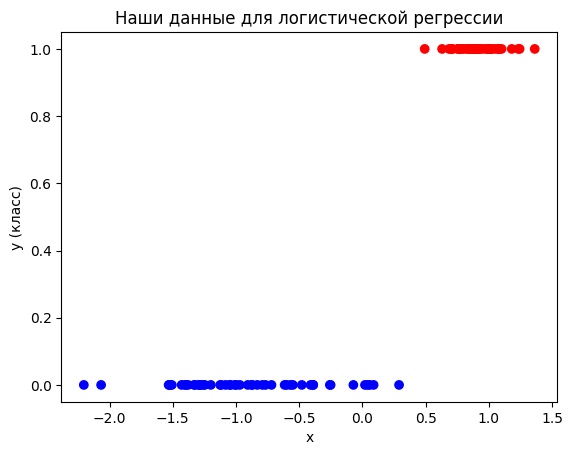

In [3]:
x, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0,
                           n_clusters_per_class=1, random_state=1)
scaler=StandardScaler()
x = scaler.fit_transform(x)

plt.scatter(x, y, c=y, cmap='bwr')
plt.xlabel('x')
plt.ylabel('y (класс)')
plt.title('Наши данные для логистической регрессии')
plt.show()

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_likelihood(x, y, w, b):
    z = x @ w + b
    p = sigmoid(z)
    eps = 1e-9
    return np.sum(y * np.log(p + eps) + (1 - y) * np.log(1 - p + eps))
    

In [7]:
w = np.random.randn(1)
b = 0
lr = 0.1
losses = []
for i in range(1000):
    z = x @ w + b
    p = sigmoid(z)
    grad_w = (x.T @ (p - y)) / len(y)
    grad_b = np.mean(p - y)

    w -= lr * grad_w
    b -= lr * grad_b

    ll = log_likelihood(x, y, w, b)
    losses.append(ll)
print(f'w = {w[0]:.4f}, b = {b:.4f}')


w = 4.9121, b = -0.9997


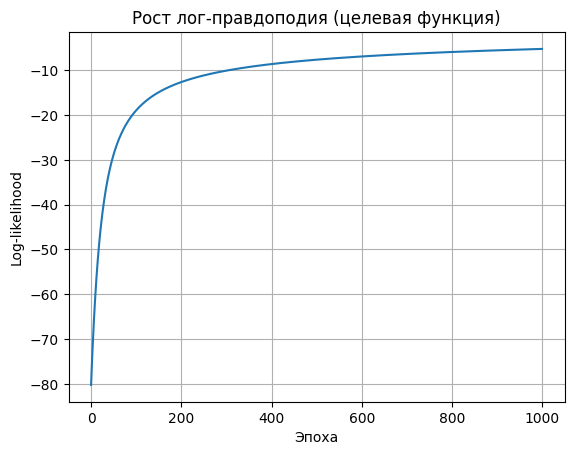

In [8]:
plt.plot(losses)
plt.title('Рост лог-правдоподия (целевая функция)')
plt.xlabel('Эпоха')
plt.ylabel('Log-likelihood')
plt.grid()
plt.show()

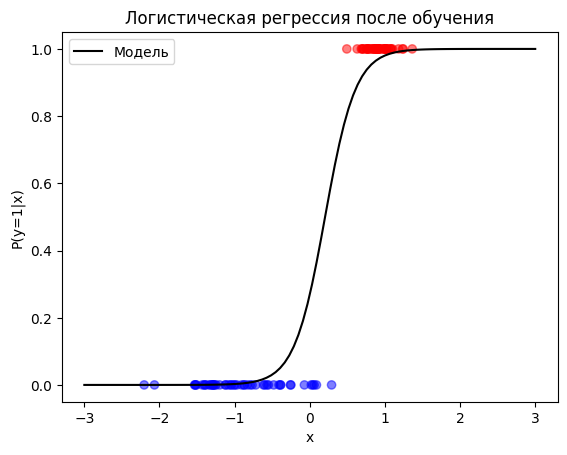

In [10]:
x_range = np.linspace(-3, 3, 100).reshape(-1, 1)
probs = sigmoid(x_range @ w + b)

plt.scatter(x, y, c=y, cmap='bwr', alpha=0.5)
plt.plot(x_range, probs, color='black', label='Модель')
plt.title("Логистическая регрессия после обучения")
plt.xlabel("x")
plt.ylabel("P(y=1|x)")
plt.legend()
plt.show()